<h2><b>Data Analytics- notebook</b></h2>

<h4><b>Dataset name / short description:</b></h4>

Unemployment by age groups in California, US.

<h4><b>Data source (url):</b></h4>

The dataset is located in kaggle.com. <br>
https://www.kaggle.com/datasets/sahirmaharajj/unemployment-by-age-groups-dataset/data

<h4><b>Data format:</b></h4>

The data format is single csv-file.

<h4><b>Data description, features and limitations:</b></h4>

I sourced the unemployment data by age groups from Kaggle.com. This dataset comprises non-seasonally adjusted California unemployment rates categorized by age groups, derived from the Current Population Survey.

The age groups span from 16-19, 20-24, 25-34, 35-44, 45-54, 55-64, to 65+.

However, it's important to note a limitation: the dataset exclusively focuses on unemployment rates within California. While it provides valuable insights into age-related unemployment trends within the state, it lacks broader geographical coverage, limiting its applicability to other regions or comparative analyses.

<h3><b>Code: importing modules, custom functions and loading the data</b></h3>

In [3]:
# Importing the usual data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as dt
import os
import plotly.express as px

# Load the data
unemployment_data = pd.read_csv("unemployment_rate_by_age_groups.csv")

ModuleNotFoundError: No module named 'numpy'

<h3><b>Code: Data clean-up procedure</b></h3>

In [ ]:
# View the data
unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'])
unemployment_data.head()

,Area Type,Area Name,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,State,California,2008-02-01,2008,February,0.184,0.093,0.053,0.040,0.041,0.039,0.048
1,State,California,2008-03-01,2008,March,0.187,0.096,0.054,0.041,0.042,0.038,0.050
2,State,California,2008-04-01,2008,April,0.187,0.097,0.055,0.043,0.043,0.037,0.050
3,State,California,2008-05-01,2008,May,0.187,0.101,0.057,0.044,0.045,0.036,0.050
4,State,California,2008-06-01,2008,June,0.191,0.105,0.059,0.044,0.046,0.038,0.048


In [ ]:
# Check for missing values
unemployment_data.isnull().sum()

Area Type    0
Area Name    0
Date         0
Year         0
Month        0
Age 16-19    0
Age 20-24    0
Age 25-34    0
Age 35-44    0
Age 45-54    0
Age 55-64    0
Age 65+      0
dtype: int64

There are no missing values.

In [ ]:
# Check for unique values
unemployment_data.nunique()

Area Type      1
Area Name      1
Date         194
Year          17
Month         12
Age 16-19    135
Age 20-24     89
Age 25-34     70
Age 35-44     74
Age 45-54     71
Age 55-64     60
Age 65+       70
dtype: int64

I will drop the "Area Type" and "Area Name" columns because they don't provide any additional information for analysis and are only unique value. The dataset is specifically for California, so these columns are redundant.

In [ ]:
# Drop the unnecessary columns
unemployment_data = unemployment_data.drop(columns = ['Area Type', 'Area Name'])
unemployment_data.head()

,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,2008-02-01,2008,February,0.184,0.093,0.053,0.040,0.041,0.039,0.048
1,2008-03-01,2008,March,0.187,0.096,0.054,0.041,0.042,0.038,0.050
2,2008-04-01,2008,April,0.187,0.097,0.055,0.043,0.043,0.037,0.050
3,2008-05-01,2008,May,0.187,0.101,0.057,0.044,0.045,0.036,0.050
4,2008-06-01,2008,June,0.191,0.105,0.059,0.044,0.046,0.038,0.048


In [ ]:
# Compact the data for better visualization
unemployment_data2 = pd.melt(unemployment_data, id_vars = ['Date', 'Year', 'Month'])
unemployment_data2.columns = ['Date', 'Year', 'Month', 'Age Group', 'Unemployment Rate']
unemployment_data2.head()

,Date,Year,Month,Age Group,Unemployment Rate
0,2008-02-01,2008,February,Age 16-19,0.184
1,2008-03-01,2008,March,Age 16-19,0.187
2,2008-04-01,2008,April,Age 16-19,0.187
3,2008-05-01,2008,May,Age 16-19,0.187
4,2008-06-01,2008,June,Age 16-19,0.191


<h3><b>Code: Data analysis</b></h3>

Firstly, let's visualize the unemployment rate over the years for different age groups. I want to display a simple bar plot to visualize the unemployment rate in percentages across all age groups in the dataset. I want to observe the significant differences between different age groups.

/var/folders/l9/x0255jx977jgl0hnb9tcnzr80000gp/T/ipykernel_13364/3561948383.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




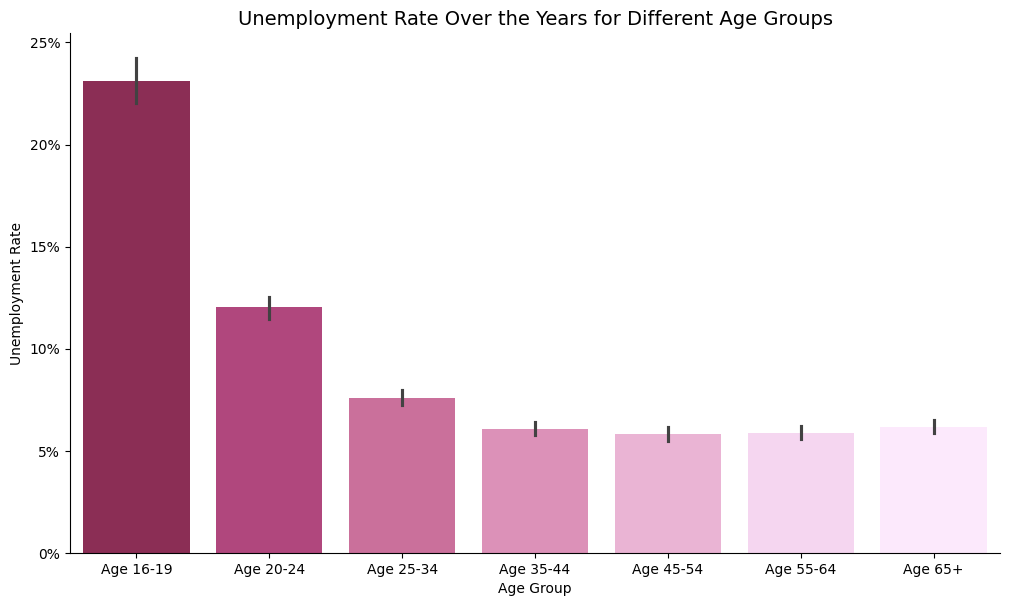

In [ ]:
# Set the figure size for the plot
plt.figure(figsize = (12, 6.75))

# Create a bar plot using seaborn, specifying data, x-axis as 'Age Group', y-axis as 'Unemployment Rate',
# and custom color palette for each age group
ax = sns.barplot(data = unemployment_data2, x = 'Age Group', y = 'Unemployment Rate', palette = ['#9B1E53', '#C2357E', '#D9619B', '#E885B8', '#F3ABD6', '#FAD1F3', '#FFE6FF'] )

# Set the title of the plot
plt.title('Unemployment Rate Over the Years for Different Age Groups', fontsize = 14)

# Format the y-axis labels to display percentages
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals = 0))

# Set the lower limit of the y-axis to 0
plt.ylim(0)

# Remove the spines (the borders) from the plot
sns.despine()

plt.show()

Next, I want to use a line plot to visualize how the unemployment rate changes throughout the years. I want to visualize each age group with its own line.

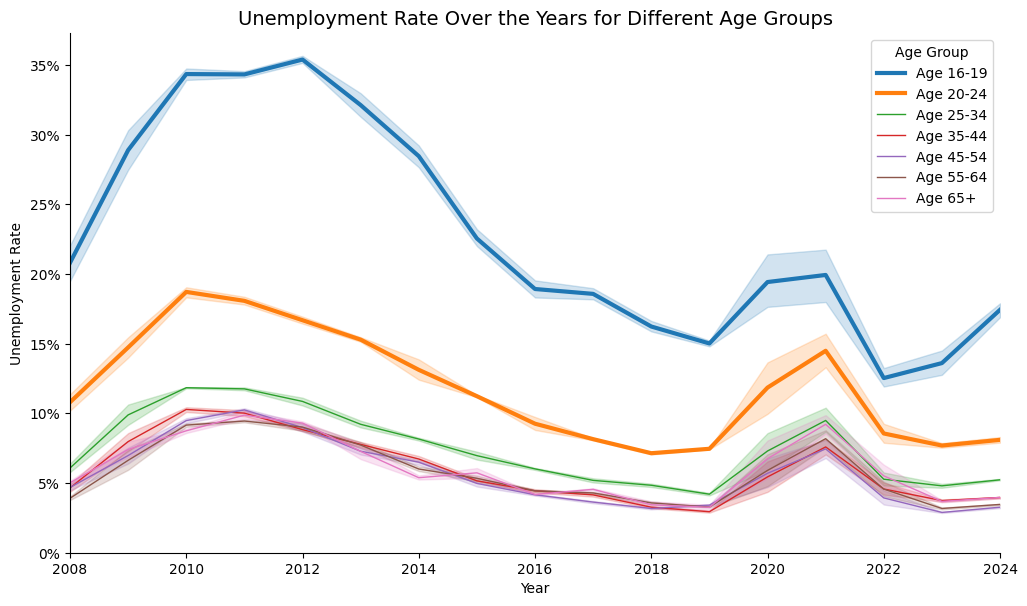

In [ ]:
# Set the figure size for the plot
plt.figure(figsize = (12, 6.75))

# Create a line plot using seaborn, specifying data, x-axis as 'Date', y-axis as 'Unemployment Rate',
# hue as 'Age Group' to display different lines for each age group, and size as 'Age Group' to control the thickness of lines
ax = sns.lineplot(data = unemployment_data2, x = 'Year', y = 'Unemployment Rate', hue = 'Age Group', size = 'Age Group', sizes = [3,3,1,1,1,1,1])

# Set the title of the plot
plt.title('Unemployment Rate Over the Years for Different Age Groups', fontsize = 14)

# Set margins of x-axis to 0 to remove any extra space
ax.margins(x=0)

# Format the y-axis labels to display percentages
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals = 0))

# Set the lower limit of the y-axis to 0
plt.ylim(0)

# Remove the spines (the borders) from the plot
sns.despine()

plt.show()

Next, I'd like to employ a different type of plot to illustrate the unemployment rate for each age group. I'll calculate the average unemployment rate for each group and represent it in a Pie Chart. My aim is to create a very easy to read plot.

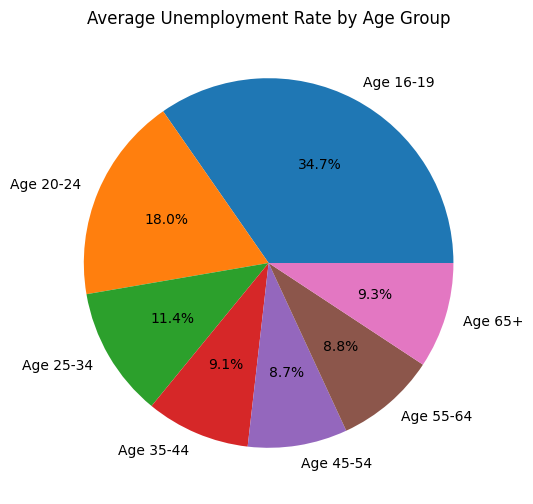

In [ ]:
# Calculate average unemployment rate by age group
avg_unemployment = unemployment_data2.groupby('Age Group')['Unemployment Rate'].mean()

# Plotting a pie chart with percentage labels, using a figure size of 8x8 inches
avg_unemployment.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))

plt.title('Average Unemployment Rate by Age Group')
plt.ylabel('') # Removing the label for the y-axis
plt.show()

I came across this plot in the code section of Kaggle.com, and I found it relevant to use here as well. The plot effectively highlights two spikes in the unemployment rate over the years. Additionally, it provides insights into the reasons behind these spikes, offering valuable and interesting information overall.

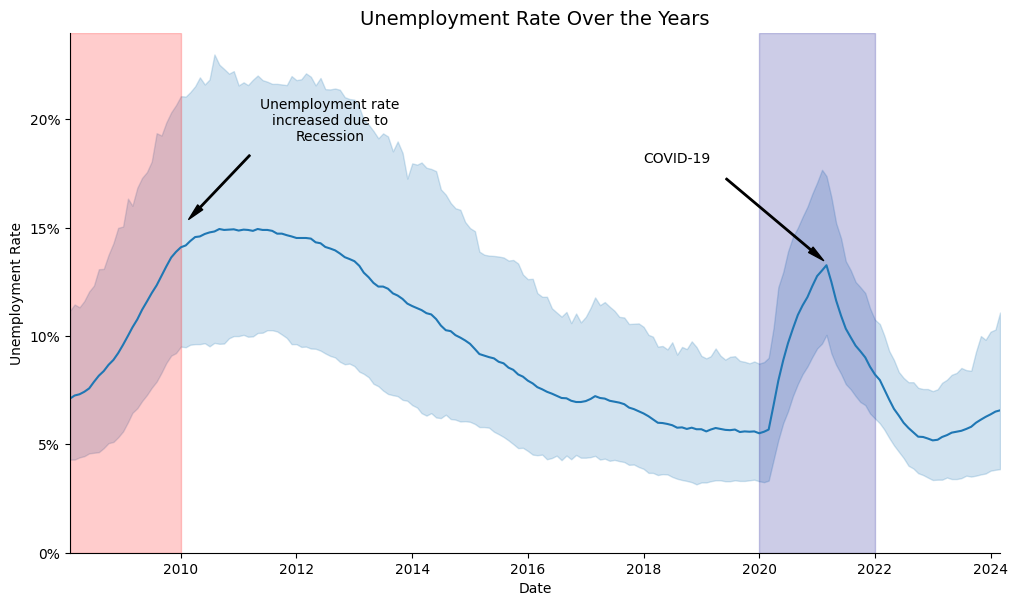

In [ ]:
# Set the figure size
plt.figure(figsize = (12, 6.75))

# Create a line plot
ax = sns.lineplot(data = unemployment_data2, x = 'Date', y = 'Unemployment Rate')

# Set the title
plt.title('Unemployment Rate Over the Years', fontsize = 14)

# Set x-axis margins
ax.margins(x=0)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals = 0)) 

# Set y-axis limit
plt.ylim(0)

# Highlight recession period
plt.axvspan(dt.datetime(2008, 2, 1), 
            dt.datetime(2009, 12, 31), 
            color='red', 
            alpha=0.2)
# Annotate recession period
ax.annotate('Unemployment rate\nincreased due to\nRecession', 
            xy=(dt.datetime(2009, 12, 31), .15), 
            xytext=(dt.datetime(2012, 7, 31), .19),
            arrowprops=dict(facecolor='black', 
                            shrink=0.1, 
                            width = 1,
                            headwidth = 5),
            ha = 'center'
           )

# Highlight COVID-19 period
plt.axvspan(dt.datetime(2020, 1, 1), 
            dt.datetime(2021, 12, 31), 
            color='darkblue', 
            alpha=0.2)
# Annotate COVID-19 period
ax.annotate('COVID-19', 
            xy=(dt.datetime(2021, 5, 1), .13), 
            xytext=(dt.datetime(2018, 1, 1), .18),
            arrowprops=dict(facecolor='black', 
                            shrink=0.1, 
                            width = 1,
                            headwidth = 5),
           )

# Remove spines
sns.despine()

plt.show()

I also saw this animated bar plot in the Kaggle.com code section and definitely wanted to use it in my analysis of this dataset. This animated bar chart visualizes the unemployment rate for different age groups over time, specifically focusing on the period during and after the COVID-19 pandemic in California. Each frame of the animation represents a different date, showing how the unemployment rate changes over time for each age group.

In [ ]:
# Filter the dataset for dates after December 31, 2019
filtered_data = unemployment_data2[unemployment_data2['Date'] > '2019-12-31']

# Create the animated bar plot using Plotly Express
fig = px.bar(filtered_data, 
             x='Age Group', 
             y='Unemployment Rate', 
             animation_frame='Date', 
             color='Age Group',
             range_y=[0, .25])

# Update layout properties
fig.update_layout(
    plot_bgcolor='white',
    yaxis_tickformat=".0%",  # Format y-axis tick labels as percentage
    title='California Unemployment During and After COVID-19'  # Set title
)

fig.show()

<h3><b>Results and summary:</b></h3>

One of the most interesting findings in this dataset was observing two noticeable spikes in the unemployment rate trendline. The first spike occurred in 2010, coinciding with a recession. This recession was primarily a result of the global financial crisis that began in 2007-2008. It was characterized by a severe downturn in economic activity, leading to widespread job losses and high unemployment rates.

The second spike occurred between 2020 and 2022, largely attributed to the COVID-19 pandemic. According to Google, the first reported case of COVID-19 in California was confirmed on January 25, 2020, in Orange County. The situation rapidly escalated thereafter, resulting in widespread job losses across various sectors. The pandemic's impact on employment was profound and enduring, as evidenced by the data trends.

Interestingly, the data also reveals a rise in unemployment rates in 2023. This indicates ongoing economic challenges and underscores the need for continued monitoring and intervention.

Given that this dataset segments unemployment by age groups, certain patterns emerge. Notably, younger age groups exhibit higher unemployment rates. This could be attributed to several factors, including delayed entry into the job market and a lack of requisite education and skills among individuals in their late teens and early twenties.

Moreover, many younger individuals in California are enrolled in higher education institutions, such as colleges and universities. While some may engage in part-time employment while pursuing their studies, others may prioritize education over employment, resulting in elevated unemployment rates within this demographic.

One surprising observation in the dataset is that age groups (35-44, 45-54, 55-64, 65+) demonstrate similar percentages of unemployment. This contrasts with expectations, as one might anticipate higher unemployment rates among older age groups, particularly those aged 65 and above, compared to individuals aged 35-44. This finding underscores the complexity of employment dynamics and warrants further investigation into underlying factors influencing unemployment across different age cohorts. 

<h3><b>Ideas for further improvements:</b></h3>

For further enhancements, I propose incorporating additional demographic information into the dataset, such as gender. Exploring how gender influences unemployment rates could yield valuable insights into disparities and potential areas for intervention. Additionally, considering factors like pregnancy and their impact on employment could provide nuanced perspectives on workforce dynamics. Although collecting such data may pose challenges, the potential insights gained could be invaluable.

Another intriguing avenue for exploration is comparing unemployment rates between 1950 and 2020. However, it's important to acknowledge the limitations of such a comparison. Data collection methods and employment structures differed significantly between these periods, potentially skewing the reliability of the analysis. Nevertheless, examining historical trends could offer valuable context for understanding contemporary employment patterns.

Furthermore, conducting spatial analyses to identify regions within California with the highest unemployment rates could shed light on localized economic challenges. Understanding the socio-economic factors contributing to unemployment in these areas could inform targeted policy interventions and support initiatives. By identifying commonalities among individuals experiencing unemployment, such as educational attainment, industry of employment, or access to resources, policymakers and stakeholders can develop more effective strategies to address unemployment and promote economic resilience.